In [1]:
import torch
import torchvision
from torchvision import datasets, transforms

import matplotlib.pyplot as plt
import os
from torch.utils.data import DataLoader
from torch import nn, optim
from torch.autograd.variable import Variable
import pickle
from IPython import display

In [2]:
imgsize = 56
batch_size = 16
DATA_DIR = 'Datasets/Elements'
IMG_DIR = os.path.join(DATA_DIR, 'Resultados')

In [3]:
IMG_SIZE = 56

poketransform = transforms.Compose(
    [transforms.Resize((IMG_SIZE, IMG_SIZE)),
     transforms.ToTensor(),
     transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])]
)

Pokedata = torchvision.datasets.ImageFolder(root=DATA_DIR, transform=poketransform)

dataloader = DataLoader(Pokedata,batch_size=batch_size, shuffle=True)

Começo de teste dos data set

In [4]:
image_path = "Datasets/Elements/train"

In [5]:
import os
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str or pathlib.Path): target directory
  
  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [6]:
walk_through_dir(image_path)

There are 19 directories and 0 images in 'Datasets/Elements/train'.
There are 0 directories and 180 images in 'Datasets/Elements/train\Bug'.
There are 0 directories and 36 images in 'Datasets/Elements/train\Dark'.
There are 0 directories and 36 images in 'Datasets/Elements/train\Dragon'.
There are 0 directories and 138 images in 'Datasets/Elements/train\Electric'.
There are 0 directories and 98 images in 'Datasets/Elements/train\Fairy'.
There are 0 directories and 98 images in 'Datasets/Elements/train\Fighting'.
There are 0 directories and 180 images in 'Datasets/Elements/train\Fire'.
There are 0 directories and 304 images in 'Datasets/Elements/train\Flying'.
There are 0 directories and 36 images in 'Datasets/Elements/train\Ghost'.
There are 0 directories and 200 images in 'Datasets/Elements/train\Grass'.
There are 0 directories and 200 images in 'Datasets/Elements/train\Ground'.
There are 0 directories and 80 images in 'Datasets/Elements/train\Ice'.
There are 0 directories and 310 ima

In [7]:
# Get image and label from custom DataLoader
img_custom, label_custom = next(iter(dataloader))

# Batch size will now be 1, try changing the batch_size parameter above and see what happens
print(f"Image shape: {img_custom.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label_custom.shape}")

Image shape: torch.Size([32, 3, 56, 56]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([32])


Fim

In [8]:
img, label = Pokedata[0]

In [9]:
label

0

In [10]:
img

tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]]])

In [11]:
def lookat_dataset(dataset, pilimg=False):
    figure = plt.figure(figsize=(16, 4))
    rows, cols = 2, 8
    for i in range(1, 17):
        sample_idx = torch.randint(len(dataset), size=(1,)).item()
        img, label = dataset[sample_idx] 
        figure.add_subplot(rows, cols, i)
        plt.axis("off")
        if pilimg:
            plt.imshow(img)
        else:
            img = (img.squeeze() * 0.5) + 0.5
            if len(img.shape) == 2:
                plt.imshow(img, cmap='gray')
            else:
                plt.imshow(img.permute(1, 2, 0))
    plt.show()


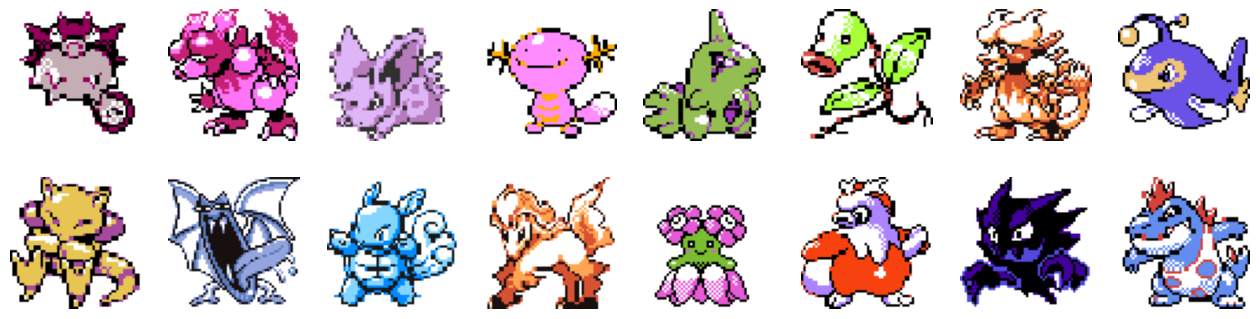

In [25]:
lookat_dataset(Pokedata)

Gerador

In [26]:
class Generator(nn.Module):
  def __init__(self, n_in, n_out):
    super().__init__()

    self.layers = nn.Sequential(
        nn.Linear(n_in, 256),
        nn.LeakyReLU(0.2),
        nn.Linear(256, 512),
        nn.LeakyReLU(0.2),
        nn.Linear(512, 1024),
        nn.LeakyReLU(0.2),
        nn.Linear(1024, n_out),
        nn.Tanh()
        #Linear funçaõ com numero de entradas e saidas de neuronios
        #LeakyReLU funcao de ativação
    )

  def forward(self, z):
    return self.layers(z)

In [14]:
class Discriminator(nn.Module):
  def __init__(self, n_in):
    super().__init__()
    n_out = 1

    self.layers = nn.Sequential(
        nn.Linear(n_in, 1024),
        nn.LeakyReLU(0.2),

        nn.Linear(1024, 512),
        nn.LeakyReLU(0.2),

        nn.Linear(512, 256),
        nn.LeakyReLU(0.2),

        torch.nn.Linear(256, 1),
        torch.nn.Sigmoid()
        # Linear funçaõ com numero de entradas e saidas de neuronios
        # LeakyReLU funcao de ativação
    )

  def forward(self, x):
    return self.layers(x)

In [15]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Rodando na {device}")

Rodando na cuda


In [16]:

noise_dim = 100
generator = Generator(noise_dim, 3* imgsize * imgsize).to(device)
discriminator = Discriminator(3* imgsize * imgsize).to(device)

In [17]:
def images_to_vectors(images):
    return images.view(images.size(0), -1)

def vectors_to_images(vectors, nc=3):
    return vectors.view(vectors.size(0), nc, imgsize, imgsize)

def noise(size, dim=noise_dim):
    return torch.randn(size, dim).to(device)

def log_images(test_images, savepath=None):
    figure = plt.figure(figsize=(8, 8))
    figure.subplots_adjust(wspace=-0.08, hspace=0.01)
    rows, cols = len(test_images) // 4, 4
    for i, img in enumerate(test_images):
        figure.add_subplot(rows, cols, i + 1)
        plt.axis("off")
        # Normalizar os valores das imagens para o intervalo [0, 1]
        img = (img + 1) / 2
        # Transpor os eixos de [channels, height, width] para [height, width, channels]
        plt.imshow(img.transpose(1, 2, 0))
    
    if savepath is not None:
        figure.savefig(savepath)
    plt.show()

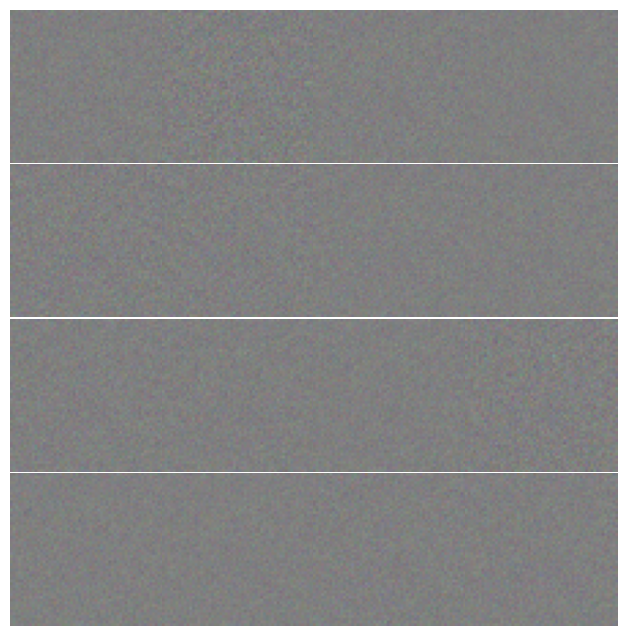

In [18]:
num_teste_samples = 16
torch.manual_seed(7777)
test_noise = noise(num_teste_samples,noise_dim)
imagepath = os.path.join(IMG_DIR, f'{0}.jpg')
log_images(
    vectors_to_images(
        generator(test_noise)).cpu().detach().numpy(),
    "Resultados/0.jpg"
        )


Treinamento

In [19]:
def real_data_target(size, device=device):
  return torch.ones(size, 1).to(device)

def fake_data_target(size, device=device):
  return torch.zeros(size, 1).to(device)

In [20]:
lr = 0.0002
lr1 = 0.0001
g_optimizer = optim.Adam(generator.parameters(), lr = lr)

d_optimizer = optim.Adam(discriminator.parameters(), lr = lr1)

loss = nn.BCELoss()


In [21]:
def train_discriminator(optimizer, real_data, fake_data):
    optimizer.zero_grad()

    # Passagem para frente com dados reais
    pred_real = discriminator(real_data)
    error_real = loss(pred_real, torch.ones_like(pred_real))  # Calcula o erro com rótulos reais (1s)
    error_real.backward()

    # Passagem para frente com dados falsos
    pred_fake = discriminator(fake_data.detach())  # Detach fake_data para evitar cálculos no gerador
    error_fake = loss(pred_fake, torch.zeros_like(pred_fake))  # Calcula o erro com rótulos falsos (0s)
    error_fake.backward()

    optimizer.step()

    return error_real + error_fake, pred_real, pred_fake

def train_generator(optimizer, fake_data):
    optimizer.zero_grad()

    pred = discriminator(fake_data)
    error = loss(pred, torch.ones_like(pred))  # O objetivo do gerador é enganar o discriminador (rótulos reais)
    error.backward()
    optimizer.step()

    return error



Epoch: 0/64 Losses:
Discriminator: 1.2533; Generator: 3.4928
D(x): 0.6792; D(G(z)): 0.2935


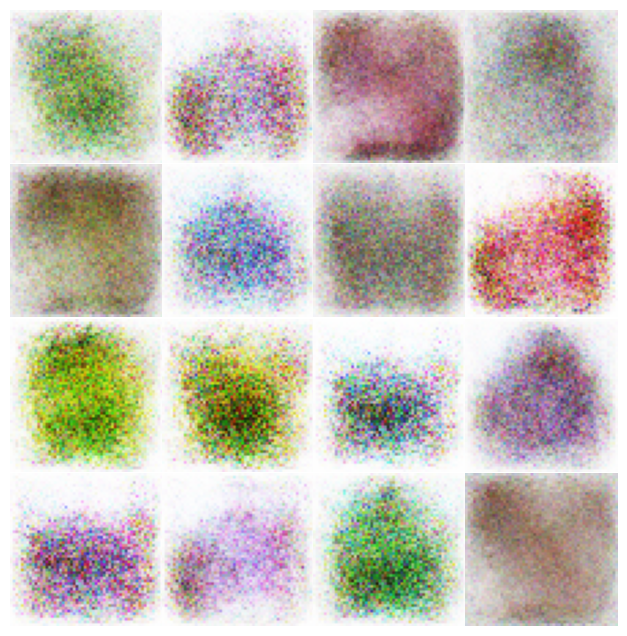

Epoch: 8/64 Losses:
Discriminator: 0.8584; Generator: 1.5671
D(x): 0.7969; D(G(z)): 0.3245


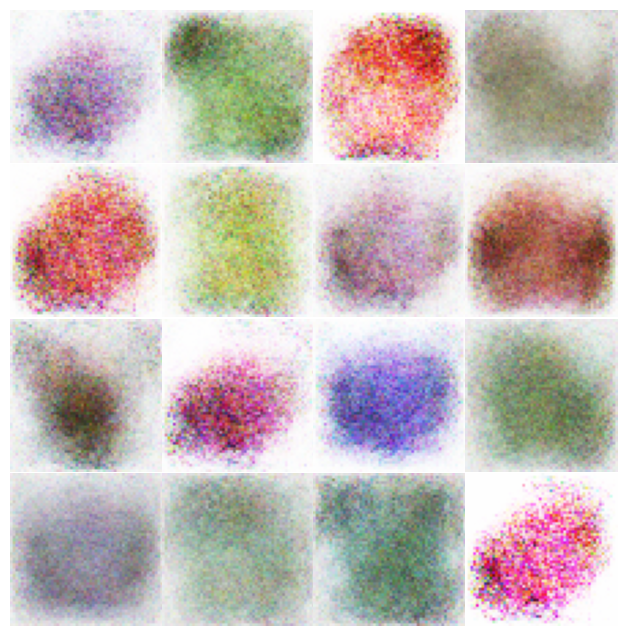

Epoch: 16/64 Losses:
Discriminator: 0.6747; Generator: 3.0868
D(x): 0.8204; D(G(z)): 0.2279


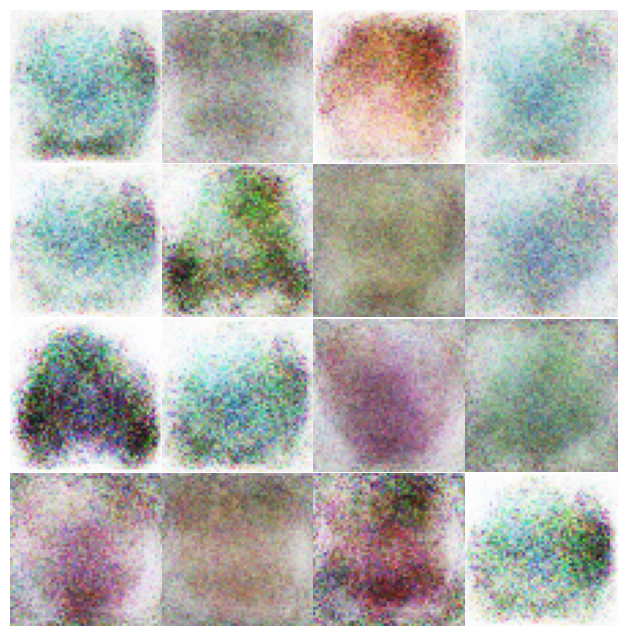

Epoch: 24/64 Losses:
Discriminator: 0.8575; Generator: 2.1414
D(x): 0.8038; D(G(z)): 0.3502


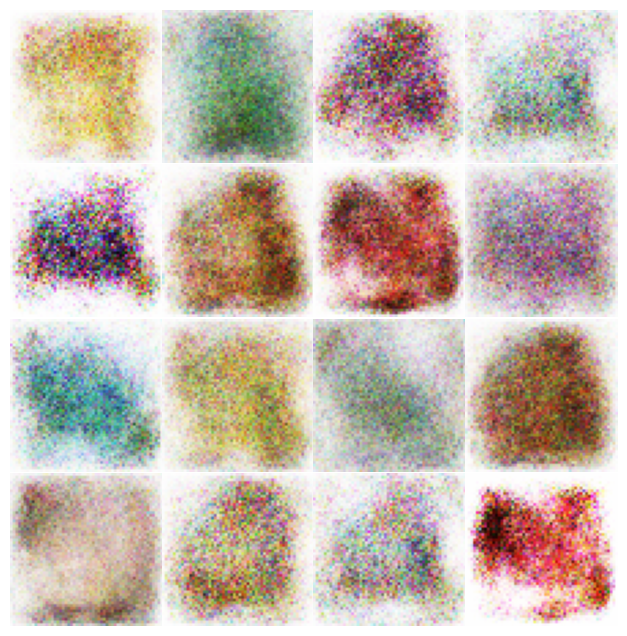

Epoch: 32/64 Losses:
Discriminator: 0.4713; Generator: 3.3753
D(x): 0.8903; D(G(z)): 0.1972


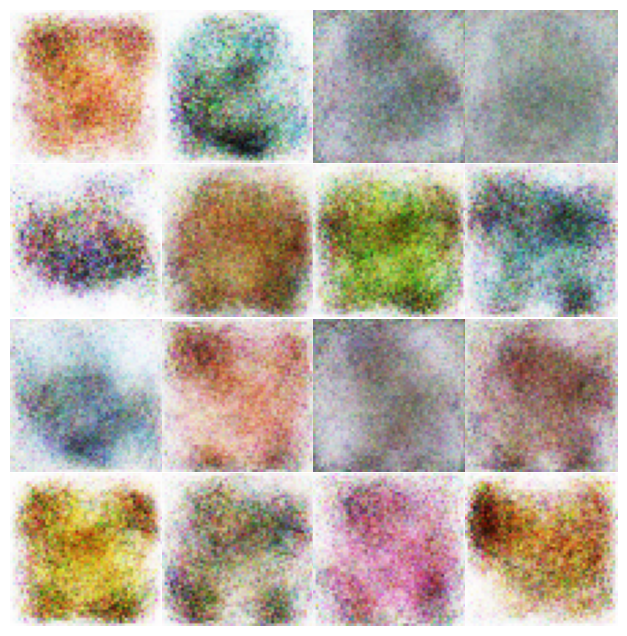

Epoch: 40/64 Losses:
Discriminator: 0.7762; Generator: 2.3708
D(x): 0.8797; D(G(z)): 0.3518


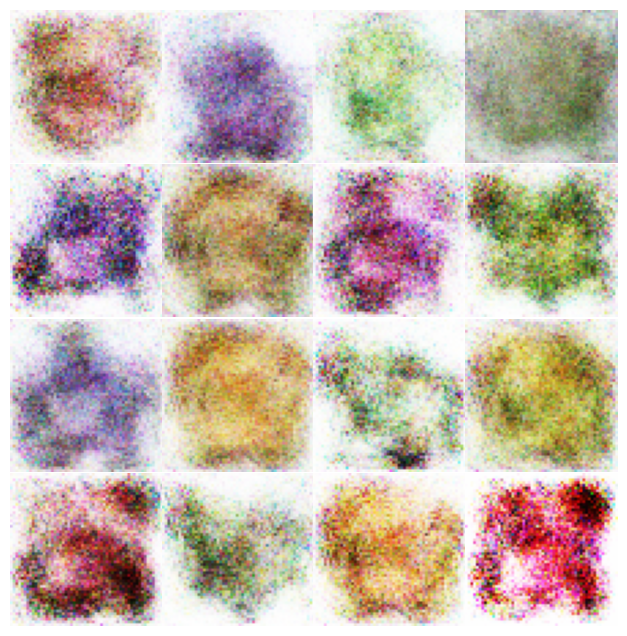

Epoch: 48/64 Losses:
Discriminator: 0.6620; Generator: 2.9172
D(x): 0.8017; D(G(z)): 0.1056


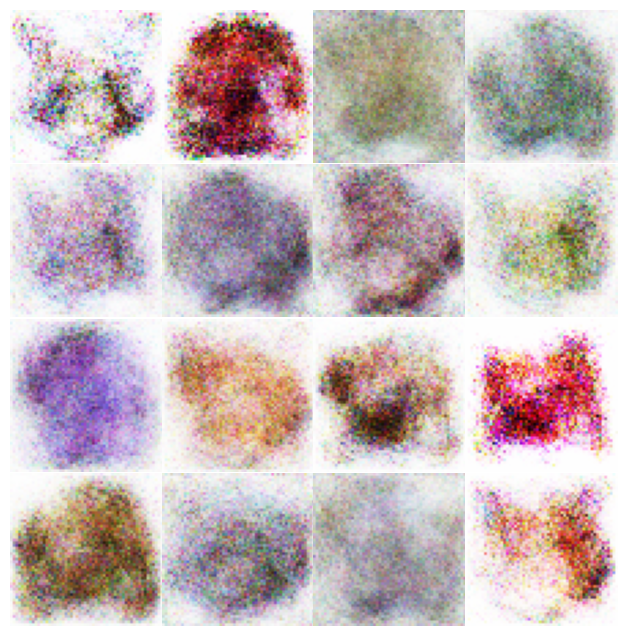

Epoch: 56/64 Losses:
Discriminator: 0.2572; Generator: 3.4559
D(x): 0.8826; D(G(z)): 0.0785


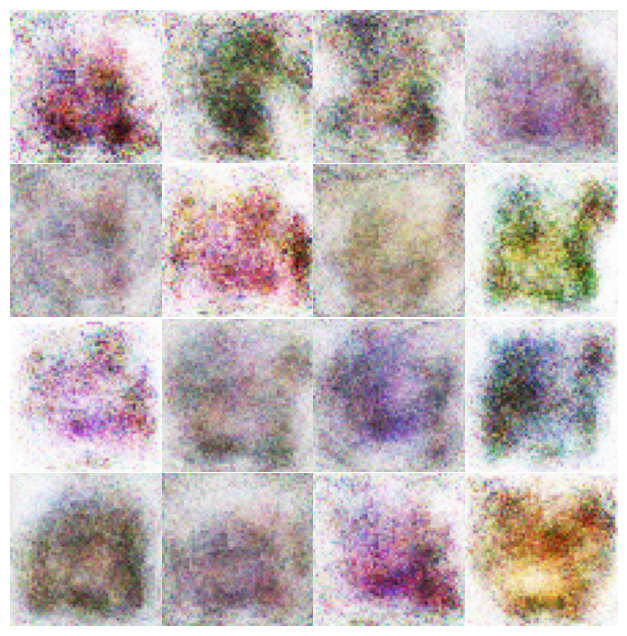

In [28]:
num_epochs = 64
G_losses = []
D_losses = []

for epoch in range(num_epochs):
  for realbatch, _ in dataloader:
    real_data = images_to_vectors(realbatch).to(device)

    fake_data = generator(noise(real_data.size(0)))

    d_error, dpred_real, dpred_fake= (
        train_discriminator(d_optimizer, real_data, fake_data)
    )

    fake_data = generator(noise(realbatch.size(0)))
    g_error = train_generator(g_optimizer, fake_data)

  imagepath = os.path.join("Resultados", f'{epoch+1}.jpg')
  test_images = vectors_to_images(generator(test_noise)).cpu().detach().numpy() 

  G_losses.append(g_error)
  D_losses.append(d_error)
  if epoch % 8 == 0:
    print(f"Epoch: {epoch}/{num_epochs} Losses:")
    print(f"Discriminator: {d_error:.4f}; Generator: {g_error:.4f}")
    print(f"D(x): {dpred_real.mean():.4f}; D(G(z)): {dpred_fake.mean():.4f}")
    log_images(test_images, imagepath)
  if g_error > 6 and g_error < 7:
    gerador_medio = "gerador_medio.pth"
    torch.save(generator.state_dict(), gerador_medio)
    print("Gerador médio salvo")


In [23]:
  print(f"Discriminator: {d_error:.4f}; Generator: {g_error:.4f}")
  print(f"D(x): {dpred_real.mean():.4f}; D(G(z)): {dpred_fake.mean():.4f}")

Discriminator: 1.1263; Generator: 1.4988
D(x): 0.6075; D(G(z)): 0.2749


In [29]:
gerador_medio = "gerador_medio.pth"
torch.save(generator.state_dict(), gerador_medio)
print("Gerador médio salvo")

Gerador médio salvo
